# Classification with Iris Dataset

In [361]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#### Import the data from CSV, and apply encoding to class names:

In [362]:
iris = pd.read_csv('./Datasets/iris.csv', index_col=False, names=['sepal_length', 
                                                 'sepal_width', 
                                                 'petal_length', 
                                                 'petal_width', 
                                                 'class'])

In [363]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Exploration and Preparation

In [364]:
iris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

We can see that all three classes have an equal number of entries.

In [365]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The data is in correct format with no null values.

In [366]:
# Split data into features (Y) and labels (Y)
X = iris.iloc[:,:4].values
Y = iris.iloc[:,4].values

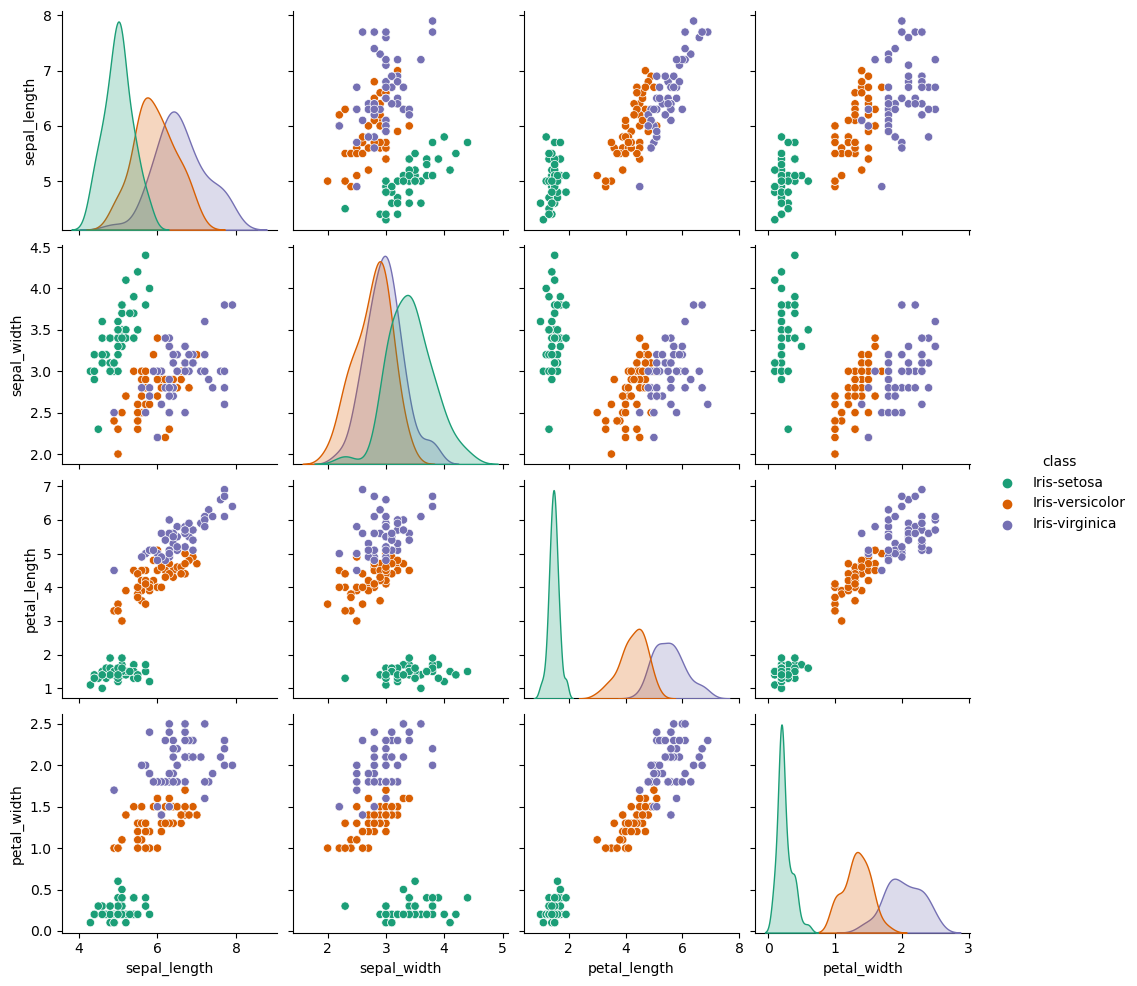

In [367]:
sns.pairplot(iris, hue='class', palette='Dark2')

As can be seen, it is likely that iris-setosa is linearly seperable from the other classes. The remaining classes are not linearly seperable.

Apply normalisation using a scaler:

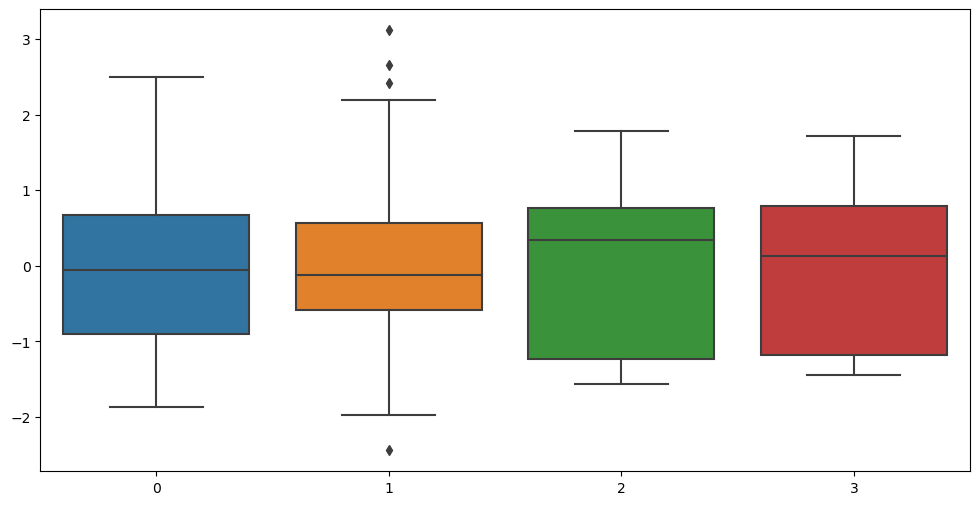

In [368]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X = scaler.fit_transform(X) 

fig,ax=plt.subplots(1,figsize=(12,6)) 
sns.boxplot(data=X,ax=ax)

Split the data into training and testing.

*Note, this split does not apply to K-fold cross-validation used later*

In [369]:
from sklearn.model_selection import train_test_split

# Split into training and testing data with a 75%/25% split, respectively
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

## Logistic Regression

Instantiate and train a logistic regression model:

In [370]:
from sklearn.linear_model import LogisticRegression

# Create and fit a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

Use simple training and testing accuracy to evaluate:

In [371]:
from sklearn import metrics

print('Training:\t',metrics.accuracy_score(y_train, log_reg.predict(x_train)))

y_predict = log_reg.predict(x_test)
print('Testing:\t',metrics.accuracy_score(y_test, y_predict))

Training:	 0.9910714285714286
Testing:	 0.9210526315789473


Use K-fold cross-validation to evaluate:

In [372]:
from sklearn.model_selection import cross_val_score

# Score logistic regression model
kfold_scores = cross_val_score(log_reg, X, Y, scoring='accuracy')
print('Logistic regression:\t', kfold_scores.mean())

Logistic regression:	 0.9600000000000002


Text(0.5, 1.05, 'Logistic regression\n')

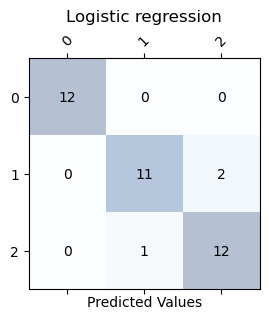

In [373]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
# Plot confusion matrix, 
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
 for j in range(cm.shape[1]):
     ax.text(x=j, y=i,
         s=cm[i, j], 
         va='center', ha='center')
classes=["0","1","2"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )
plt.title('Logistic regression\n')

## Support Vector Machine (SVM)

Use grid search to find best hyperparameters for SVM:

In [374]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 

params = {'C': [0.1, 1, 5, 25, 125, 600], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear']}
svm_gridsearch = GridSearchCV(SVC(), params, refit=True, verbose=1)
svm_gridsearch.fit(x_train,y_train)
print(svm_gridsearch.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'C': 125, 'gamma': 1, 'kernel': 'linear'}


*note that the C value changes with each run, implying that changing this value makes little impact on the performance of the model*

Instantiate and train a linear SVM with best parameters from above:

In [375]:
svm = SVC(C=5, kernel='linear', gamma=1, probability=True)
svm.fit(x_train, y_train)

SVC(C=5, gamma=1, kernel='linear', probability=True)

In [376]:
print('Training accuracy:\t',metrics.accuracy_score(y_train, svm.predict(x_train)))
y_predict = svm.predict(x_test)
print('Testing accuracy:\t',metrics.accuracy_score(y_test, y_predict))

Training accuracy:	 0.9821428571428571
Testing accuracy:	 0.9473684210526315


Use k-fold cross-validation to evaluate and compare models:

In [377]:
# Score decision tree model
kfold_scores = cross_val_score(svm, X, Y, scoring='accuracy')
print('SVM:\t', kfold_scores.mean())

SVM:	 0.9666666666666668


Text(0.5, 1.05, 'SVM\n')

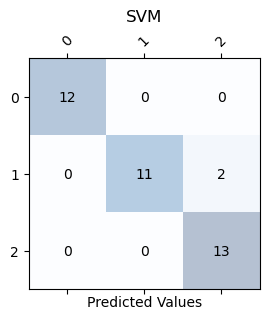

In [378]:
cm = confusion_matrix(y_test, y_predict)
# Plot confusion matrix, 
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
 for j in range(cm.shape[1]):
     ax.text(x=j, y=i,
         s=cm[i, j], 
         va='center', ha='center')
classes=["0","1","2"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )
plt.title('SVM\n')

## Decision Tree

In [379]:
# Decision tree parameters
depth = 3

Instantiate and train decision tree model:

In [380]:
from sklearn import tree

# Create a decision tree classifier model using defined parameters
dt_classifier = tree.DecisionTreeClassifier(max_depth=depth)

# Train the model using training features and training labels
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.4, 0.875, 'X[2] <= -0.744\ngini = 0.667\nsamples = 112\nvalue = [38, 37, 37]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.6, 0.625, 'X[3] <= 0.725\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.4, 0.375, 'X[2] <= 0.677\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]'),
 Text(0.2, 0.125, 'gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.6, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

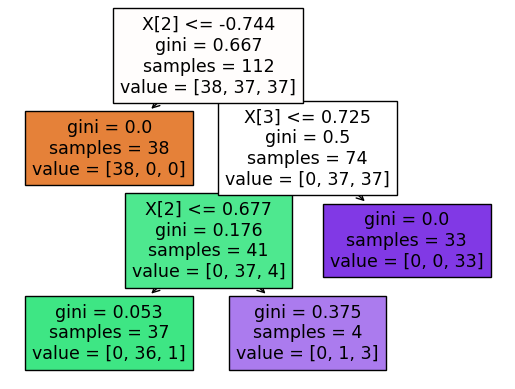

In [381]:
tree.plot_tree(dt_classifier, filled=True)

In [382]:
print('Training accuracy:\t',metrics.accuracy_score(y_train, dt_classifier.predict(x_train)))
y_predict = dt_classifier.predict(x_test)
print('Testing accuracy:\t',metrics.accuracy_score(y_test, y_predict))

Training accuracy:	 0.9821428571428571
Testing accuracy:	 0.9473684210526315


Text(0.5, 1.05, 'Tree 1\n')

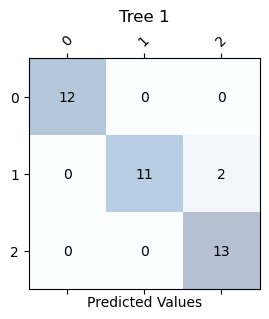

In [383]:
cm = confusion_matrix(y_test, y_predict)
# Plot confusion matrix, 
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
 for j in range(cm.shape[1]):
     ax.text(x=j, y=i,
         s=cm[i, j], 
         va='center', ha='center')
classes=["0","1","2"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )
plt.title('Tree 1\n')

Train a second decision tree classifier for comparison, using a different depth:

In [384]:
depth_2 = 5
dt_2 = tree.DecisionTreeClassifier(max_depth=depth_2)
dt_2.fit(x_train, y_train)

y_predict = dt_2.predict(x_test)
print(metrics.accuracy_score(y_test, y_predict))

0.9473684210526315


Text(0.5, 1.05, 'Tree 2\n')

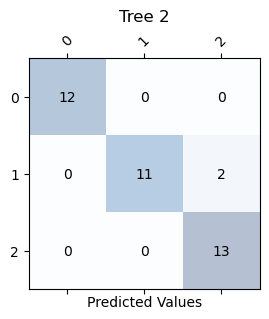

In [385]:
cm = confusion_matrix(y_test, y_predict)
# Plot confusion matrix, 
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
 for j in range(cm.shape[1]):
     ax.text(x=j, y=i,
         s=cm[i, j], 
         va='center', ha='center')
classes=["0","1","2"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )
plt.title('Tree 2\n')

Use k-fold cross-validation to evaluate and compare models:

In [386]:
# Score decision tree model
kfold_scores = cross_val_score(dt_classifier, X, Y, scoring='accuracy')
print('Decision Tree 1:\t', kfold_scores.mean())

# Compare a second DT with different parameters
kfold_scores = cross_val_score(dt_2, X, Y, scoring='accuracy')
print('Decision Tree 2:\t', kfold_scores.mean())

Decision Tree 1:	 0.9733333333333334
Decision Tree 2:	 0.9600000000000002


## Artificial Neural Network

Instantiate and train model:

In [387]:
from sklearn.neural_network import MLPClassifier

# Generate a multi-layer perceptron ANN and fit to the training data
ann = MLPClassifier(max_iter=2500, hidden_layer_sizes=(3,3))
ann.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=2500)

Use simple testing accuracy to evaluate model:

In [388]:
print('Training accuracy:\t',metrics.accuracy_score(y_train, ann.predict(x_train)))
y_predict = ann.predict(x_test)
print('Testing accuracy:\t',metrics.accuracy_score(y_test, y_predict))

Training accuracy:	 0.9910714285714286
Testing accuracy:	 0.9210526315789473


Text(0.5, 1.05, 'ANN 1\n')

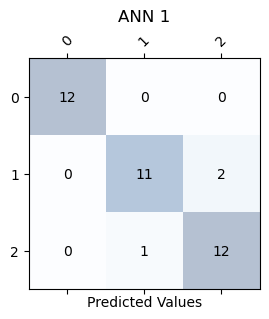

In [389]:
cm = confusion_matrix(y_test, y_predict)
# Plot confusion matrix, 
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
 for j in range(cm.shape[1]):
     ax.text(x=j, y=i,
         s=cm[i, j], 
         va='center', ha='center')
classes=["0","1","2"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )
plt.title('ANN 1\n')

Create second MLP with different parameters for comparison:

In [390]:
ann_2 = MLPClassifier(max_iter=5000, hidden_layer_sizes=(5,5))

Text(0.5, 1.05, 'ANN 2\n')

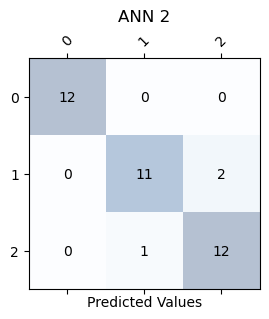

In [391]:
cm = confusion_matrix(y_test, y_predict)
# Plot confusion matrix, 
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
 for j in range(cm.shape[1]):
     ax.text(x=j, y=i,
         s=cm[i, j], 
         va='center', ha='center')
classes=["0","1","2"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )
plt.title('ANN 2\n')

Use k-fold cross-validation to evaluate and compare models:

In [392]:
# Score ANN model
kfold_scores = cross_val_score(ann, X, Y, scoring='accuracy')
print('ANN 1:\t', kfold_scores.mean())

# Compare a second ANN with different parameters
kfold_scores = cross_val_score(ann_2, X, Y, scoring='accuracy')
print('ANN 2:\t', kfold_scores.mean())

ANN 1:	 0.9
ANN 2:	 0.96
